In [1]:
import pandas as pd
import numpy as np 
from helpers import s3_connection
import helpers 

In [2]:
s3 = s3_connection()

Connection successful


## Ouverture des données

In [3]:
path_logements_existants = "clichere/diffusion/DPE/DPE_ADEME/dpe-v2-logements-existants.csv"
DPE_logements_existants = s3.read_file_from_s3(path_logements_existants)
DPE_logements_existants

/home/onyxia/work/STATAPP/helpers.py:31: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)


,Date_réception_DPE,Date_établissement_DPE,Modèle_DPE,Date_fin_validité_DPE,Version_DPE,Méthode_application_DPE,Etiquette_DPE,Etiquette_GES,Année_construction,Type_bâtiment,...,Code_postal_(brut),N°_étage_appartement,Nom_résidence,Cage_d'escalier,Complément_d'adresse_logement,Statut_géocodage,Nom__commune_(Brut),N°_département_(BAN),N°_région_(BAN),Complément_d'adresse_bâtiment
0,2021-12-23,2021-12-22,DPE 3CL 2021 méthode logement,2031-12-21,2.0,dpe appartement individuel,D,C,1945.0,appartement,...,25000,NaN,NaN,NaN,NaN,adresse géocodée ban à l'adresse,Besançon,25,27.0,NaN
1,2022-01-03,2021-12-01,DPE 3CL 2021 méthode logement,2031-11-30,1.1,dpe appartement individuel,D,D,1948.0,appartement,...,13016,0.0,NaN,NaN,Etage : 6,adresse non géocodée ban car aucune correspond...,MARSEILLE,13,93.0,NaN
2,2023-04-07,2023-04-07,DPE 3CL 2021 méthode logement,2033-04-06,2.2,dpe appartement généré à partir des données DP...,D,B,NaN,appartement,...,32000,0.0,NaN,NaN,Lot : 00045-00004-00002 - Porte : 2 - Etage : ...,adresse non géocodée ban car aucune correspond...,AUCH,32,76.0,c52041673531345
3,2021-12-22,2021-12-02,DPE 3CL 2021 méthode logement,2031-12-01,1.1,dpe issu d'une étude thermique réglementaire R...,C,C,1976.0,appartement,...,44800,NaN,NaN,NaN,NaN,adresse géocodée ban à l'adresse,Saint-Herblain,44,52.0,NaN
4,2022-01-03,2021-10-26,DPE 3CL 2021 méthode logement,2031-10-25,1.1,dpe appartement individuel,D,D,1948.0,appartement,...,92330,0.0,NaN,NaN,Etage : NC,adresse non géocodée ban car aucune correspond...,SCEAUX,92,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537520,2022-10-25,2022-10-25,DPE 3CL 2021 méthode logement,2032-10-24,2.2,dpe appartement généré à partir des données DP...,E,E,1971.0,appartement,...,95230,NaN,NaN,NaN,3-R039L-05/06 ( 2/4 all des bouleaux)-82-R039L...,adresse géocodée ban à l'adresse,SOISY-SOUS-MONTMORENCY,95,11.0,NaN
4537521,2022-07-21,2022-07-21,DPE 3CL 2021 méthode logement,2032-07-20,2.1,dpe appartement généré à partir des données DP...,D,B,1948.0,appartement,...,30110,NaN,NaN,NaN,1-Bâtiment n°1-19-5010380379 PORTE 79,adresse géocodée ban à l'adresse,La Grand-Combe,30,76.0,NaN
4537522,2022-06-02,2022-06-02,DPE 3CL 2021 méthode logement,2032-06-01,2.1,dpe maison individuelle,D,D,1980.0,maison,...,41290,NaN,NaN,NaN,NaN,adresse non géocodée ban car aucune correspond...,OUCQUES,41,24.0,NaN
4537523,2022-10-27,2022-10-26,DPE 3CL 2021 méthode logement,2032-10-25,2.2,dpe appartement individuel,G,D,1945.0,appartement,...,44000,NaN,NaN,NaN,1-Bâtiment n°1-1-LogZone,adresse non géocodée ban car aucune correspond...,NANTES,44,52.0,NaN


In [4]:
path_logements_neufs = "clichere/diffusion/DPE/DPE_ADEME/dpe-v2-logements-neufs.csv"
DPE_logements_neufs = s3.read_file_from_s3(path_logements_neufs)
DPE_logements_neufs

/home/onyxia/work/STATAPP/helpers.py:31: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)


,Date_réception_DPE,Date_établissement_DPE,Date_fin_validité_DPE,Version_DPE,Modèle_DPE,Etiquette_DPE,Etiquette_GES,Type_bâtiment,Surface_habitable_logement,Adresse_brute,...,Code_postal_(brut),N°_étage_appartement,Nom_résidence,Complément_d'adresse_bâtiment,Cage_d'escalier,Complément_d'adresse_logement,Statut_géocodage,Nom__commune_(Brut),N°_département_(BAN),N°_région_(BAN)
0,2021-09-30,2021-09-29,2031-09-28,1.0,DPE NEUF logement : RT2012,C,C,maison,43.2,42 rue de Venteille,...,33185,NaN,NaN,NaN,NaN,NaN,adresse non géocodée ban car aucune correspond...,LE HAILLAN,33,75.0
1,2022-02-04,2022-02-02,2032-02-01,2.0,DPE NEUF logement : RT2012,B,A,appartement,44.2,Les Hauts de Kerdanné,...,29490,NaN,NaN,NaN,NaN,NaN,adresse non géocodée ban car aucune correspond...,GUIPAVAS,29,53.0
2,2023-04-05,2023-04-05,2033-04-04,2.2,DPE NEUF logement : RT2012,A,A,maison,105.7,Fontfary,...,7340,NaN,NaN,NaN,NaN,NaN,adresse non géocodée ban car aucune correspond...,VINZIEUX,07,84.0
3,2021-09-01,2021-09-01,2031-08-31,1.0,DPE NEUF logement : RT2012,C,C,maison,71.6,RD 12,...,31470,NaN,NaN,NaN,NaN,NaN,adresse non géocodée ban car aucune correspond...,SAINT-LYS,91,11.0
4,2022-07-25,2022-07-25,2032-07-24,2.1,DPE NEUF logement : RT2012,A,A,maison,128.8,"39, avenue Marius Mathon",...,69220,NaN,NaN,NaN,NaN,NaN,adresse non géocodée ban car aucune correspond...,BELLEVILLE,69,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537947,2022-05-16,2022-05-16,2032-05-15,2.1,DPE NEUF logement : RT2012,B,A,maison,94.2,av chabadenia,...,64210,0.0,NaN,NaN,NaN,NaN,adresse géocodée ban à l'adresse,Bidart,64,75.0
537948,2022-11-16,2022-11-16,2032-11-15,2.2,DPE NEUF logement : RT2012,B,B,appartement,65.9,Lieu dit '' TRABACCHINA '',...,20090,NaN,NaN,NaN,NaN,1-BAT_A-13-A13,adresse non géocodée ban car aucune correspond...,AJACCIO,2A,94.0
537949,2022-12-12,2022-12-12,2032-12-11,2.2,DPE NEUF logement : RT2012,C,C,appartement,77.7,Batiment 2\n167-187 RUE EDOUARD VAILLANT,...,93140,0.0,NaN,19893-2022-BDH091142-BAT-3-4,NaN,T4 Niveau R+2 Lgmt N° 422,adresse géocodée ban à l'adresse,BONDY,93,11.0
537950,2022-07-01,2022-07-01,2032-06-30,2.1,DPE NEUF logement : RT2012,C,C,appartement,66.4,155-157 Route de Fleury,...,91170,NaN,NaN,1-Batiment Collectif-1-Zone chauffée,NaN,15-A25 - 2022-06-DPE185,adresse non géocodée ban car aucune correspond...,VIRY-CHATILLON,91,11.0


In [5]:
path_valeursfoncieres_2022 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2022.txt"
vf2022 = s3.read_file_from_s3(path_valeursfoncieres_2022, sep="|")

path_valeursfoncieres_2021 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2021.txt"
vf2021 = s3.read_file_from_s3(path_valeursfoncieres_2021, sep="|")

path_valeursfoncieres_2020 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2020.txt"
vf2020 = s3.read_file_from_s3(path_valeursfoncieres_2020, sep="|")

path_valeursfoncieres_2019 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2019.txt"
vf2019 = s3.read_file_from_s3(path_valeursfoncieres_2019, sep="|")

path_valeursfoncieres_2018 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2018.txt"
vf2018 = s3.read_file_from_s3(path_valeursfoncieres_2018, sep="|")

path_valeursfoncieres_2017 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2017.txt"
vf2017 = s3.read_file_from_s3(path_valeursfoncieres_2017, sep="|")

path_valeursfoncieres_2016 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2016.txt"
vf2016 = s3.read_file_from_s3(path_valeursfoncieres_2016, sep="|")

path_valeursfoncieres_2015 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2015.txt"
vf2015 = s3.read_file_from_s3(path_valeursfoncieres_2015, sep="|")

path_valeursfoncieres_2014 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2014.txt"
vf2014 = s3.read_file_from_s3(path_valeursfoncieres_2014, sep="|")


/home/onyxia/work/STATAPP/helpers.py:31: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)
/home/onyxia/work/STATAPP/helpers.py:31: DtypeWarning: Columns (18,23,24,26,28,29,30,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)
/home/onyxia/work/STATAPP/helpers.py:31: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)
/home/onyxia/work/STATAPP/helpers.py:31: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)
/home/onyxi

In [6]:
vf = pd.concat([vf2022, vf2021, vf2020, vf2019, vf2018, vf2017, vf2016, vf2015, vf2014], ignore_index=True)

### Première analyse des données

#### DPE Logements existants

In [7]:
print("Nombre de lignes par colonnes:", len(DPE_logements_existants))

total_nan = DPE_logements_existants.isna().sum().sum()
print(f"Nombre total de NaN : {total_nan}")

# Compter le nombre de NaN par colonne
nan_par_colonne = DPE_logements_existants.isna().sum()

# Trier les colonnes par nombre de NaN décroissant et afficher les 10 premières
top_10_nan_colonnes = nan_par_colonne.sort_values(ascending=False).head(10)

print("Les 10 colonnes avec le plus de NaN :")
print(top_10_nan_colonnes)


Nombre de lignes par colonnes: 4537525
Nombre total de NaN : 17334637
Les 10 colonnes avec le plus de NaN :
Cage_d'escalier                  4473586
Nom_résidence                    4187600
Complément_d'adresse_bâtiment    2567157
Complément_d'adresse_logement    2195128
Année_construction               1484043
N°_étage_appartement             1145452
N°_voie_(BAN)                     630304
Nom__rue_(BAN)                    347796
Surface_habitable_logement         52267
Adresse_(BAN)                      29373
dtype: int64


Etiquette_DPE            A     B      C      D      E      F      G
N°_département_(BAN)                                               
01                   0.80% 2.61% 23.87% 33.95% 21.78%  9.96%  7.04%
02                   0.11% 0.87% 11.60% 29.81% 31.61% 14.92% 11.07%
03                   0.54% 3.17% 16.22% 28.77% 23.89% 14.60% 12.80%
04                   0.13% 1.22%  9.37% 23.38% 31.13% 17.28% 17.49%
05                   0.10% 0.73%  5.56% 20.51% 39.29% 17.68% 16.13%
...                    ...   ...    ...    ...    ...    ...    ...
972                  0.17% 7.74% 52.29% 29.48%  7.69%  1.93%  0.71%
973                    NaN   NaN 23.53% 47.06%  8.82%  5.88% 14.71%
974                  2.54% 2.97% 32.20% 27.54% 21.61%  8.47%  4.66%
976                    NaN 8.00%    NaN 68.00% 20.00%  4.00%    NaN
988                    NaN   NaN    NaN 83.33% 16.67%    NaN    NaN

[102 rows x 7 columns]


Le résultat est étrange car il n'y a que 101 départements en France. 

In [11]:
DPE_logements_existants["N°_département_(BAN)"] = pd.to_numeric(DPE_logements_existants["N°_département_(BAN)"], errors="coerce")
DPE_filtre101 = DPE_logements_existants[DPE_logements_existants["N°_département_(BAN)"] <= 101]


In [13]:
# Convertir en string et formater pour afficher deux chiffres
DPE_filtre101["N°_département_(BAN)"] = DPE_filtre101["N°_département_(BAN)"].astype(int).astype(str).str.zfill(2)

# Recalcul du pourcentage de chaque étiquette DPE par département
resultat = DPE_filtre101.groupby("N°_département_(BAN)")["Etiquette_DPE"].value_counts(normalize=True).unstack() * 100

# Affichage avec le bon format
pd.options.display.float_format = "{:.2f}%".format
print(resultat)


/tmp/ipykernel_62125/1691785095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPE_filtre101["N°_département_(BAN)"] = DPE_filtre101["N°_département_(BAN)"].astype(int).astype(str).str.zfill(2)


Etiquette_DPE            A     B      C      D      E      F      G
N°_département_(BAN)                                               
01                   0.80% 2.61% 23.87% 33.95% 21.78%  9.96%  7.04%
02                   0.11% 0.87% 11.60% 29.81% 31.61% 14.92% 11.07%
03                   0.54% 3.17% 16.22% 28.77% 23.89% 14.60% 12.80%
04                   0.13% 1.22%  9.37% 23.38% 31.13% 17.28% 17.49%
05                   0.10% 0.73%  5.56% 20.51% 39.29% 17.68% 16.13%
...                    ...   ...    ...    ...    ...    ...    ...
91                   0.17% 1.57% 28.65% 34.57% 20.75%  8.59%  5.71%
92                   0.13% 1.35% 19.37% 29.42% 25.82% 12.34% 11.57%
93                   0.04% 1.38% 25.07% 32.43% 23.12%  9.73%  8.23%
94                   0.10% 2.44% 23.67% 29.82% 25.13% 11.25%  7.58%
95                   0.13% 1.58% 25.29% 33.26% 23.06% 10.27%  6.41%

[94 rows x 7 columns]


/tmp/ipykernel_62125/1779478768.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j, resultat_dep[j] + 0.5, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')
/tmp/ipykernel_62125/1779478768.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j, resultat_dep[j] + 0.5, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')
/tmp/ipykernel_62125/1779478768.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.t

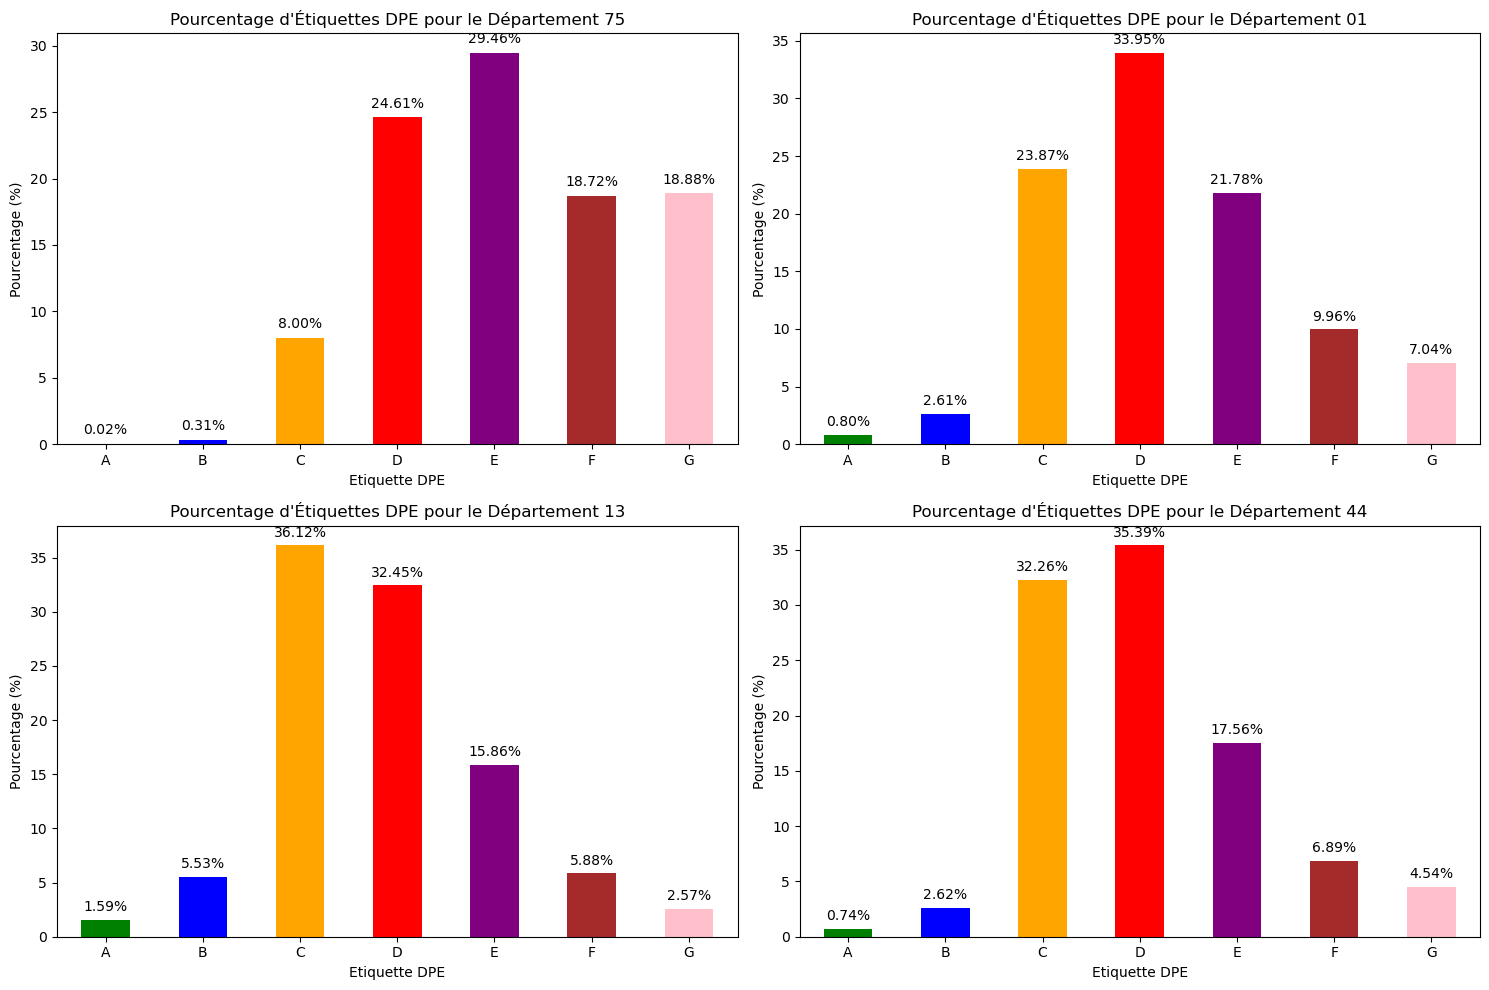

In [15]:
import matplotlib.pyplot as plt

# Liste des départements à analyser
departements = ["75", "01", "13", "44"]

# Créer un histogramme pour chaque département
plt.figure(figsize=(15, 10))

for i, dep in enumerate(departements, 1):
    plt.subplot(2, 2, i)  # Créer un subplot pour chaque département
    resultat_dep = resultat.loc[dep]  # Filtrer les données pour le département
    
    # Créer l'histogramme pour chaque département
    resultat_dep.plot(kind='bar', color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'pink'])
    
    # Ajouter les titres et labels
    plt.title(f"Pourcentage d'Étiquettes DPE pour le Département {dep}", fontsize=12)
    plt.xlabel("Etiquette DPE", fontsize=10)
    plt.ylabel("Pourcentage (%)", fontsize=10)
    
    # Afficher les pourcentages sur chaque barre
    for j in range(len(resultat_dep)):
        plt.text(j, resultat_dep[j] + 0.5, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')
    
    plt.xticks(rotation=0)

# Ajuster l'affichage et afficher le graphique
plt.tight_layout()
plt.show()


Faire analyse : j'ai choisi 75 car Paris semble moins bien isolé, vieux batiments... 13 parce que bord de mer, 01 parce que ça a l'air un peu perdu et 44 parce qu'on l'étudie.